In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
X=df.iloc[:,1:-1]

In [6]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [9]:
from sklearn.cluster import KMeans

In [10]:
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
print(inertia)

[600.0, 223.73200573676345, 140.96581663074699, 114.38954350297054, 91.00244098567248, 80.24972235577131, 71.8094621471561, 62.641008351188034, 54.25747690371484, 49.958828372190034]


In [12]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

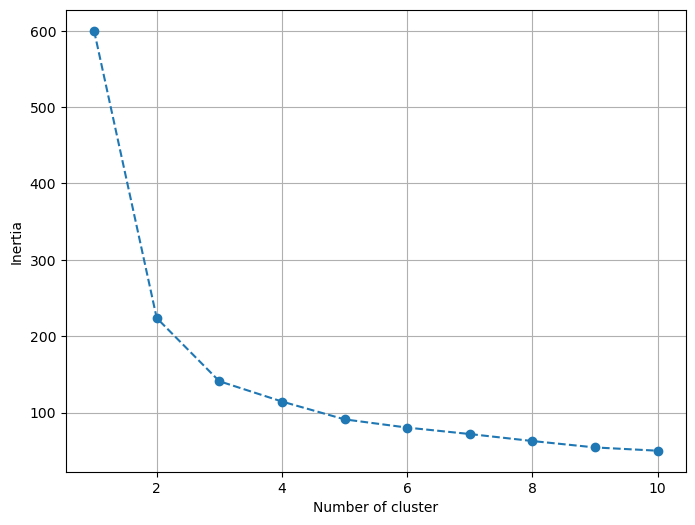

In [13]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),inertia,marker='o',linestyle='--')
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.grid()
plt.show

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300)
y_kmeans=kmeans.fit_predict(X_scaled)

In [15]:
df['Cluster']=y_kmeans

In [16]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


In [17]:
import seaborn as sns

<AxesSubplot:>

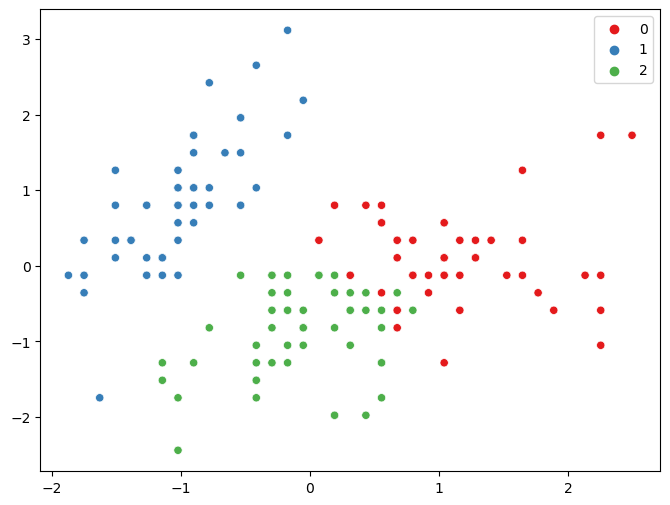

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=y_kmeans,palette='Set1')

In [19]:
centroid=kmeans.cluster_centers_

In [20]:
centroid

array([[ 1.13140499,  0.08716178,  0.98548265,  0.99875633],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.06881714, -0.89036741,  0.34501443,  0.28492552]])